In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir('C:\\RESEARCH\\LUSC\\Regression') #setting the right directory

In [3]:
# Importing the dataset
flux = pd.read_excel('LUSC_Flux.xlsx',index_col=0)
genes=pd.read_excel('LUSC_Genes.xlsx',index_col=0)

In [4]:
flux.shape

(501, 2051)

In [5]:
flux.head(2)

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,'13HTACRitr','1513TACRitr','1531TACRitr','DEOXFVSitx','FVSitx','TACRitr','13DMTitr','15DMTitr','31DMTitr',Overall Survival (Months)
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-18-3406-01,10.518463,146.49113,-505.307115,-5.696311,285.777813,124.268717,268.647858,29.491254,95.057046,-145.068167,...,23.456765,23.456765,23.456765,-315.830928,315.830928,41.782363,-9.529311,-9.529311,-9.529311,12.19
TCGA-18-3407-01,9.551598,143.67818,-434.700304,-3.660883,236.434371,128.267910,204.021467,44.445592,76.854620,-93.193927,...,18.649305,18.649305,18.649305,-262.245016,262.245016,33.219075,-7.576280,-7.576280,-7.576280,4.47


In [6]:
del flux['Overall Survival (Months)']

In [7]:
dt = flux.merge(genes,left_index=True,right_index=True)

In [8]:
dt.head()

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,SLFN12,SLFN13,SLFN14,SLFN5,SLFNL1,SLIT1,SLIT2,SLIT3,SLITRK1,Overall Survival (Months)
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
TCGA-18-3406-01,10.518463,146.491130,-505.307115,-5.696311,285.777813,124.268717,268.647858,29.491254,95.057046,-145.068167,...,0.3141,0.7349,-0.6499,1.8195,-0.9816,-0.1401,-0.5147,-0.5814,-0.2205,12.19
TCGA-18-3407-01,9.551598,143.678180,-434.700304,-3.660883,236.434371,128.267910,204.021467,44.445592,76.854620,-93.193927,...,0.0783,-0.4010,-0.1467,1.5143,-0.1113,-0.2146,-0.3133,-0.4178,-0.2303,4.47
TCGA-18-3408-01,9.522306,151.690320,-515.759083,-2.617564,317.972340,172.704049,249.346087,93.481975,97.983209,-110.961391,...,-0.4077,-0.5936,-0.2316,0.4824,-0.7531,-0.2614,0.6907,-0.7456,-0.2451,75.69
TCGA-18-3409-01,9.134161,149.337894,-421.251278,-4.635302,281.290094,125.776087,247.502726,44.047143,112.809209,-119.490189,...,-0.2600,-0.7075,-0.6499,-0.9627,-0.6501,-0.2228,-0.2258,1.1757,-0.1811,123.09
TCGA-18-3410-01,9.891407,131.511738,-602.071961,-2.724578,287.886409,185.597405,270.541368,43.652424,105.806608,-135.360164,...,-0.8499,1.2627,0.6000,-0.7937,-0.7380,-0.0738,-0.6798,-0.6544,-0.1960,4.80


In [9]:
dt.shape

(501, 16888)

In [10]:
X = dt.iloc[:,0:16886].values
y = dt.iloc[:, -1].values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.fit_transform(X_val)

In [13]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [14]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
#Predicting the Validation set results
y_predval = regressor.predict(X_val)

In [16]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_val, y_val))



0.8938361891854985
1.1827919177726378
1.0875623741986653
Variance score: -0.31


R^2 = -0.3060


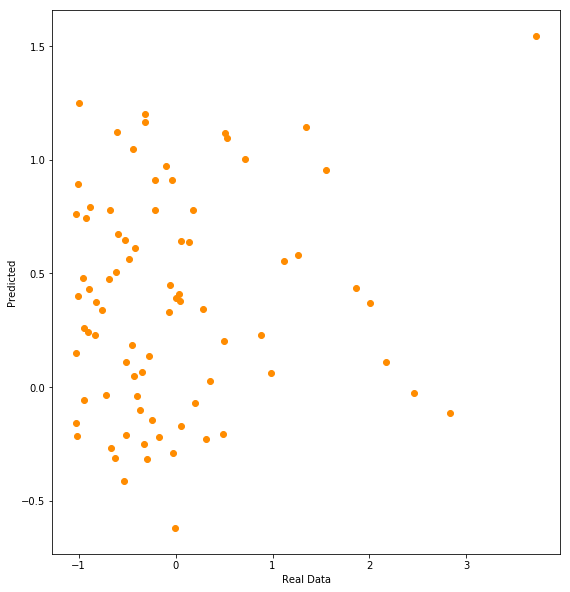

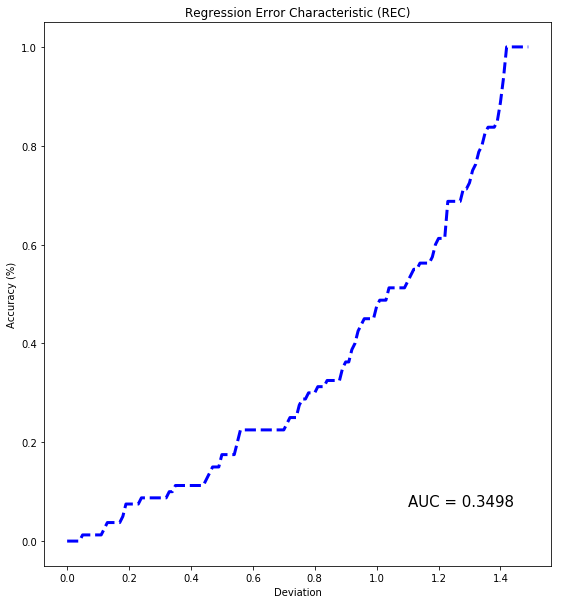

In [18]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [23]:
# GRID SEARCH
from sklearn.model_selection import GridSearchCV
param_grid = {    "n_estimators": [5,25,50,75,100],
                  "max_depth": [1,3,5,7,9,10],
                  "verbose":[1]}  

In [24]:
regressor = RandomForestRegressor()
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=10)
grid_search = grid.fit(X_train, y_train)

In [25]:
print(grid_search.best_score_, grid_search.best_params_)

0.10048475560397338 {'max_depth': 4, 'min_samples_split': 1.0}


In [26]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth = 1, n_estimators = 300, verbose = 1)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=1.0, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
#Predicting the Validation set results
y_predval = regressor.predict(X_val)

In [28]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(X_val, y_val))

0.6822044466409322
0.8589846670544914
0.9268142570410165
Variance score: 0.14
